In [1]:

import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import model_selection
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


In [2]:
url='https://archive.ics.uci.edu/ml/machine-learning-databases/dermatology/dermatology.data'
ds1=pd.read_csv(url,na_values='?',header=None) 
print(ds1.head())
data= pd.DataFrame(ds1).drop(34,axis=1)


   0   1   2   3   4   5   6   7   8   ...  26  27  28  29  30  31  32    33  34
0   2   2   0   3   0   0   0   0   1  ...   0   3   0   0   0   1   0  55.0   2
1   3   3   3   2   1   0   0   0   1  ...   0   0   0   0   0   1   0   8.0   1
2   2   1   2   3   1   3   0   3   0  ...   2   3   2   0   0   2   3  26.0   3
3   2   2   2   0   0   0   0   0   3  ...   0   0   0   0   0   3   0  40.0   1
4   2   3   2   2   2   2   0   2   0  ...   3   2   3   0   0   2   3  45.0   3

[5 rows x 35 columns]


In [3]:
print(data.head())

   0   1   2   3   4   5   6   7   8   ...  25  26  27  28  29  30  31  32    33
0   2   2   0   3   0   0   0   0   1  ...   0   0   3   0   0   0   1   0  55.0
1   3   3   3   2   1   0   0   0   1  ...   0   0   0   0   0   0   1   0   8.0
2   2   1   2   3   1   3   0   3   0  ...   0   2   3   2   0   0   2   3  26.0
3   2   2   2   0   0   0   0   0   3  ...   3   0   0   0   0   0   3   0  40.0
4   2   3   2   2   2   2   0   2   0  ...   2   3   2   3   0   0   2   3  45.0

[5 rows x 34 columns]


In [4]:
test= ds1[34]
print(test.head())

0    2
1    1
2    3
3    1
4    3
Name: 34, dtype: int64


In [5]:
ds1.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    8
34    0
dtype: int64

In [6]:
ds1[33].isna().sum()

8

In [7]:
ds1.replace('?',np.NaN,inplace=True)

In [8]:


imp = SimpleImputer(missing_values=np.NAN,strategy="mean")



In [9]:
age=imp.fit_transform(np.array(ds1[33]).reshape(-1, 1))

In [10]:
ds1[33]=age

In [11]:
ds1[33].isna().sum()

0

In [12]:
print(ds1)

     0   1   2   3   4   5   6   7   8   ...  26  27  28  29  30  31  32    33  34
0     2   2   0   3   0   0   0   0   1  ...   0   3   0   0   0   1   0  55.0   2
1     3   3   3   2   1   0   0   0   1  ...   0   0   0   0   0   1   0   8.0   1
2     2   1   2   3   1   3   0   3   0  ...   2   3   2   0   0   2   3  26.0   3
3     2   2   2   0   0   0   0   0   3  ...   0   0   0   0   0   3   0  40.0   1
4     2   3   2   2   2   2   0   2   0  ...   3   2   3   0   0   2   3  45.0   3
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   ...  ..
361   2   1   1   0   1   0   0   0   0  ...   0   1   0   0   0   2   0  25.0   4
362   3   2   1   0   1   0   0   0   0  ...   0   1   0   0   0   2   0  36.0   4
363   3   2   2   2   3   2   0   2   0  ...   3   0   3   0   0   2   3  28.0   3
364   2   1   3   1   2   3   0   2   0  ...   2   0   1   0   0   2   3  50.0   3
365   3   2   2   0   0   0   0   0   3  ...   0   0   0   0   0   3   0  35.0   1

[36

In [13]:
ds1_data=ds1.iloc[:,:34]

In [14]:
print(ds1_data)

     0   1   2   3   4   5   6   7   8   ...  25  26  27  28  29  30  31  32    33
0     2   2   0   3   0   0   0   0   1  ...   0   0   3   0   0   0   1   0  55.0
1     3   3   3   2   1   0   0   0   1  ...   0   0   0   0   0   0   1   0   8.0
2     2   1   2   3   1   3   0   3   0  ...   0   2   3   2   0   0   2   3  26.0
3     2   2   2   0   0   0   0   0   3  ...   3   0   0   0   0   0   3   0  40.0
4     2   3   2   2   2   2   0   2   0  ...   2   3   2   3   0   0   2   3  45.0
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..  ..   ...
361   2   1   1   0   1   0   0   0   0  ...   0   0   1   0   0   0   2   0  25.0
362   3   2   1   0   1   0   0   0   0  ...   1   0   1   0   0   0   2   0  36.0
363   3   2   2   2   3   2   0   2   0  ...   0   3   0   3   0   0   2   3  28.0
364   2   1   3   1   2   3   0   2   0  ...   0   2   0   1   0   0   2   3  50.0
365   3   2   2   0   0   0   0   0   3  ...   2   0   0   0   0   0   3   0  35.0

[36

In [15]:
ds1_target=ds1[34]

In [16]:
print(ds1_target)

0      2
1      1
2      3
3      1
4      3
      ..
361    4
362    4
363    3
364    3
365    1
Name: 34, Length: 366, dtype: int64


In [17]:

col=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]
sns.pairplot(ds1_data[col],size=5)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


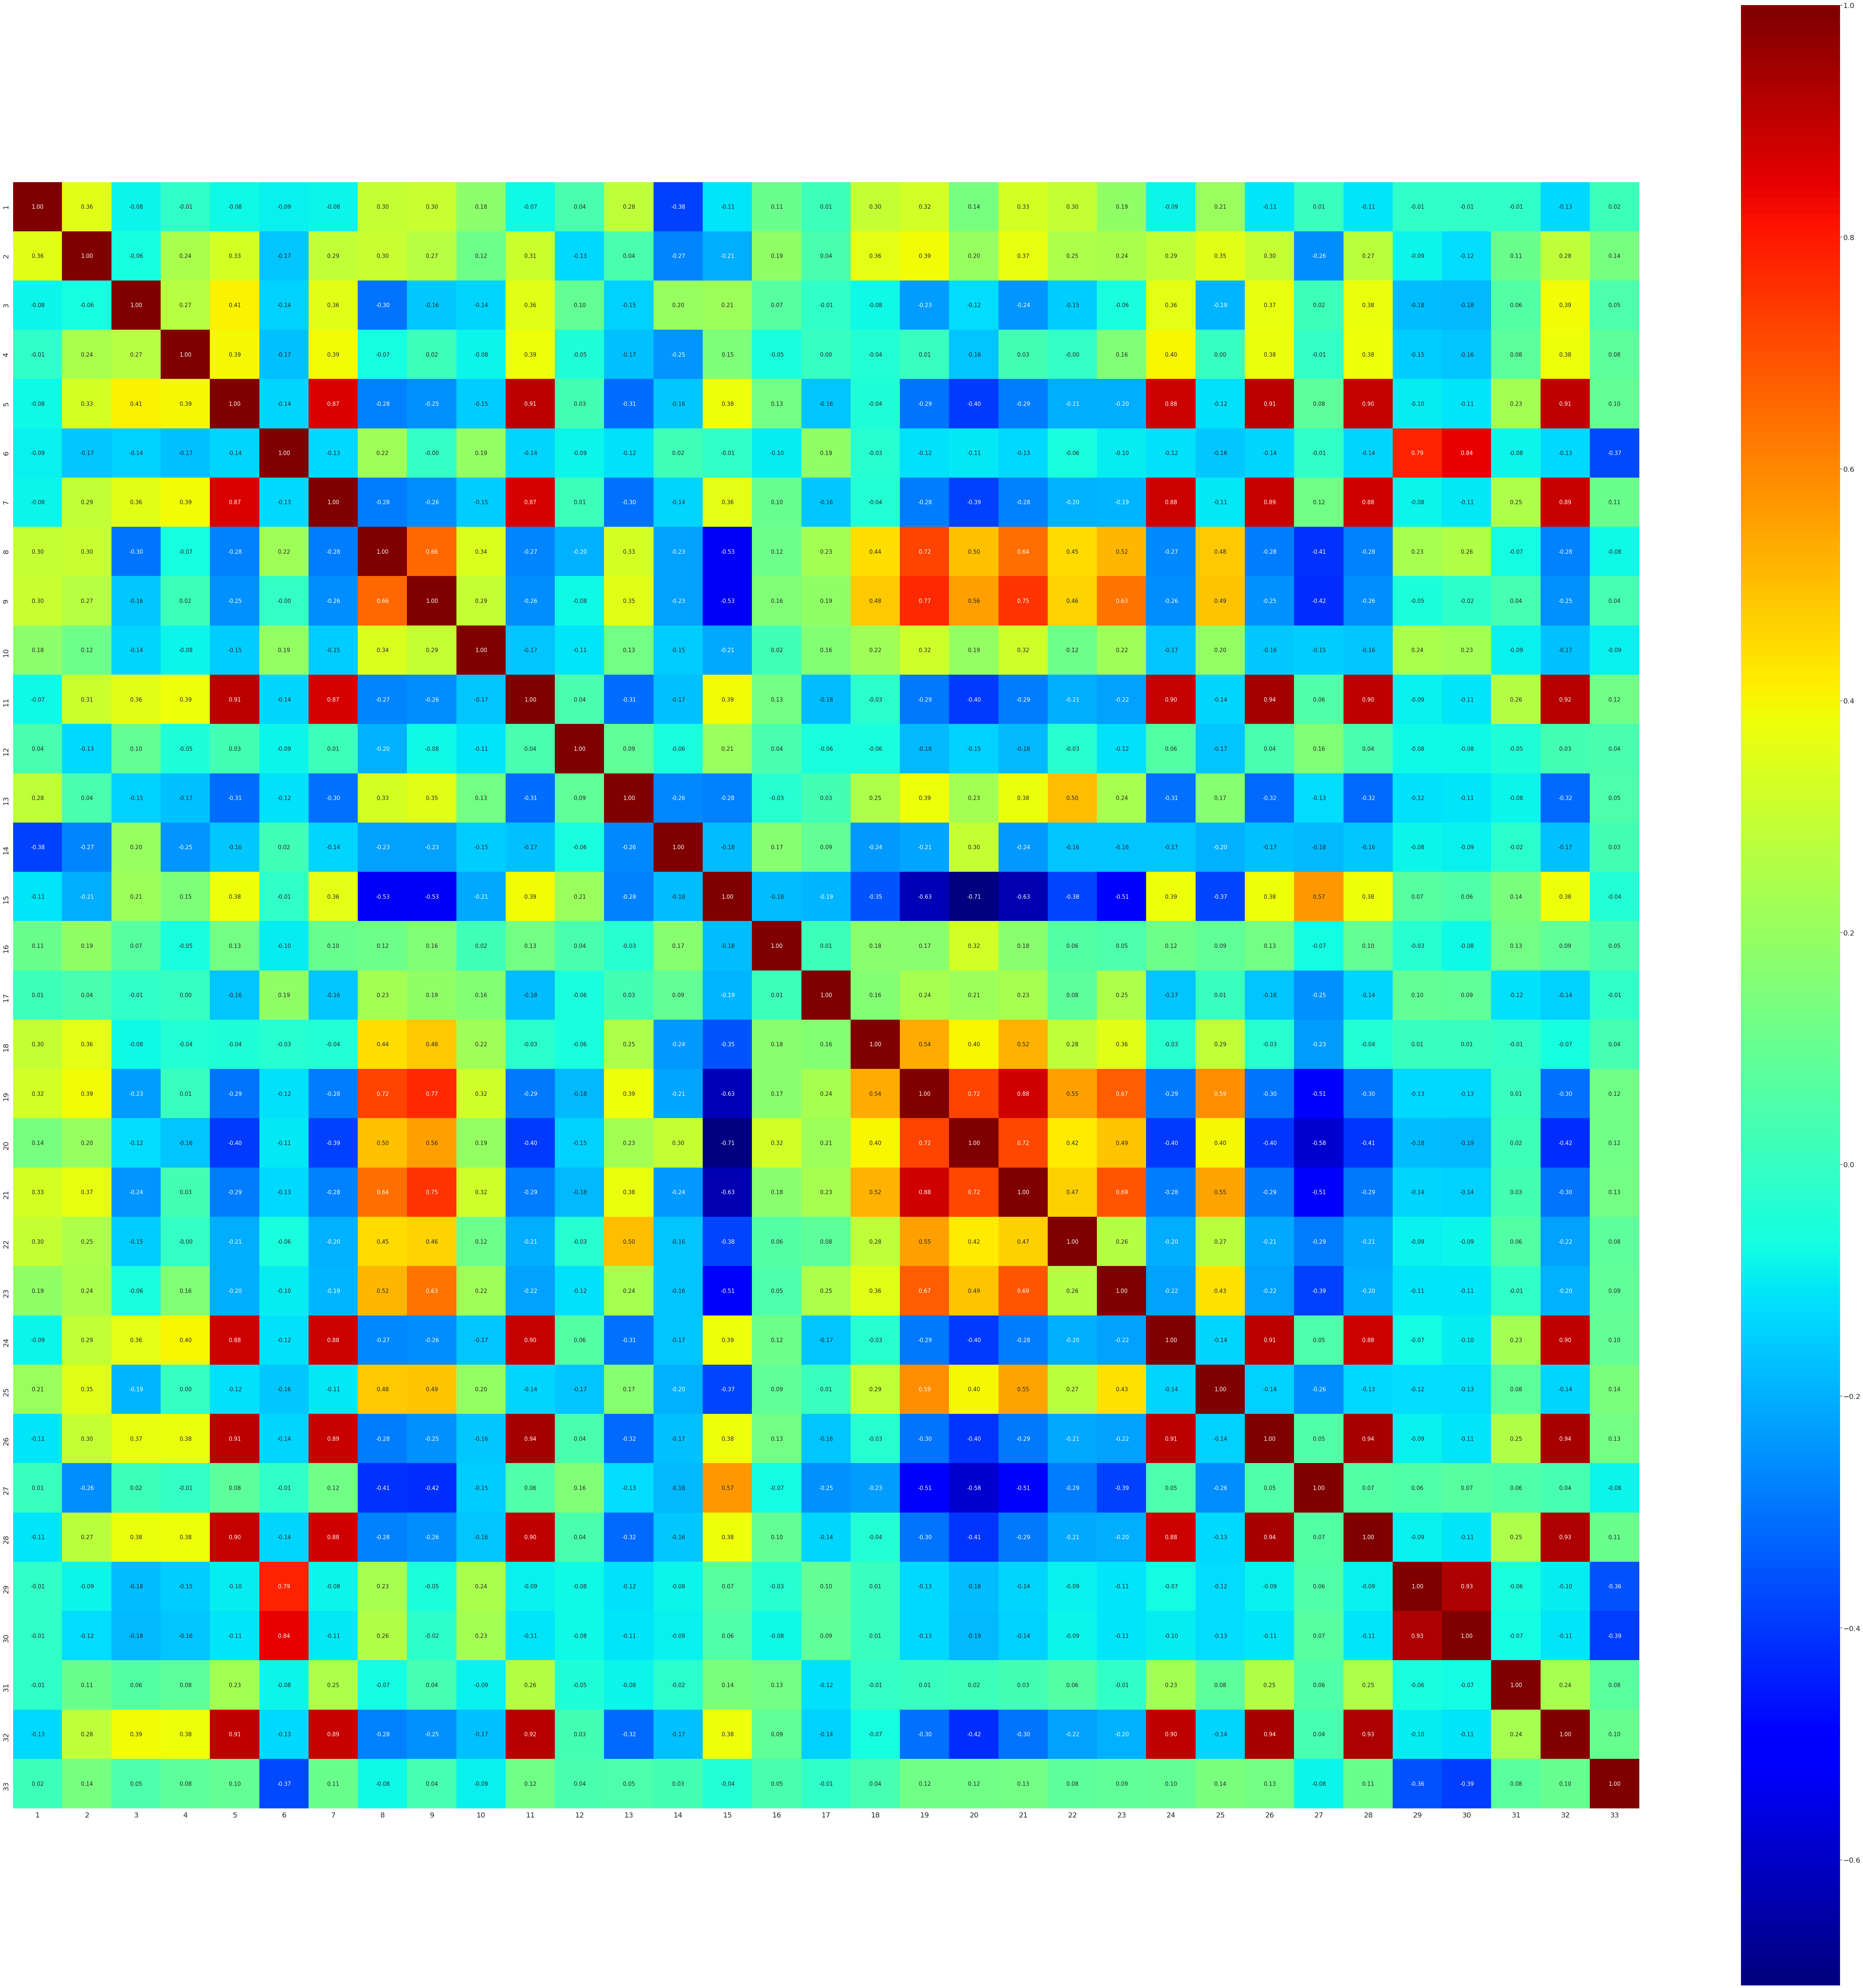

In [18]:
cm=np.corrcoef(ds1_data[col].values.T)
sns.set(font_scale=1.8)
plt.figure(figsize=(100,100))
heat=sns.heatmap(cm,cmap='jet', cbar=True,square=True,annot=True,fmt='.2f',annot_kws={'size':15}, xticklabels=col, yticklabels=col)

In [19]:

x_train, x_test, y_train, y_test= train_test_split(ds1_data,ds1_target,train_size=0.80)

In [20]:

sc=StandardScaler()
sc.fit(x_train)
x_train_sc=sc.transform(x_train)
x_test_sc=sc.transform(x_test)

In [21]:

clf=KNeighborsClassifier(n_neighbors=10)
clf.fit(x_train_sc,y_train)
y_pred_knn_1=clf.predict(x_train_sc)
y_pred_knn_2=clf.predict(x_test_sc)

In [22]:


print(confusion_matrix(y_train,y_pred_knn_1))
print(classification_report(y_train,y_pred_knn_1))
print('Accuracy score %.2f'%accuracy_score(y_train,y_pred_knn_1))
print(confusion_matrix(y_test,y_pred_knn_2))
print(classification_report(y_test,y_pred_knn_2))
print('Accuracy score %.2f'%accuracy_score(y_test,y_pred_knn_2))


[[89  0  0  0  0  0]
 [ 0 43  0  7  0  0]
 [ 0  0 60  1  0  0]
 [ 0  0  0 39  0  0]
 [ 0  0  0  0 42  0]
 [ 0  0  0  0  0 11]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        89
           2       1.00      0.86      0.92        50
           3       1.00      0.98      0.99        61
           4       0.83      1.00      0.91        39
           5       1.00      1.00      1.00        42
           6       1.00      1.00      1.00        11

    accuracy                           0.97       292
   macro avg       0.97      0.97      0.97       292
weighted avg       0.98      0.97      0.97       292

Accuracy score 0.97
[[22  1  0  0  0  0]
 [ 0 11  0  0  0  0]
 [ 0  0 11  0  0  0]
 [ 0  0  0 10  0  0]
 [ 0  0  0  0 10  0]
 [ 0  0  0  0  1  8]]
              precision    recall  f1-score   support

           1       1.00      0.96      0.98        23
           2       0.92      1.00      0.96        11
           3       1

In [23]:

rfc=RandomForestClassifier(n_estimators=10)
rfc.fit(x_train_sc,y_train)
y_pred_rf_1=rfc.predict(x_train_sc)
y_pred_rf_2=rfc.predict(x_test_sc)



In [24]:
print(confusion_matrix(y_train,y_pred_rf_1))
print(classification_report(y_train,y_pred_rf_1))
print('Accuracy score %.2f'%accuracy_score(y_train,y_pred_rf_1))

print(confusion_matrix(y_test,y_pred_rf_2))
print(classification_report(y_test,y_pred_rf_2))
print('Accuracy score %.2f'%accuracy_score(y_test,y_pred_rf_2))


[[89  0  0  0  0  0]
 [ 1 49  0  0  0  0]
 [ 0  0 61  0  0  0]
 [ 0  1  0 38  0  0]
 [ 0  0  0  0 42  0]
 [ 0  1  0  0  0 10]]
              precision    recall  f1-score   support

           1       0.99      1.00      0.99        89
           2       0.96      0.98      0.97        50
           3       1.00      1.00      1.00        61
           4       1.00      0.97      0.99        39
           5       1.00      1.00      1.00        42
           6       1.00      0.91      0.95        11

    accuracy                           0.99       292
   macro avg       0.99      0.98      0.98       292
weighted avg       0.99      0.99      0.99       292

Accuracy score 0.99
[[23  0  0  0  0  0]
 [ 0 10  0  1  0  0]
 [ 0  0 11  0  0  0]
 [ 0  0  0 10  0  0]
 [ 0  0  0  0 10  0]
 [ 1  1  0  0  0  7]]
              precision    recall  f1-score   support

           1       0.96      1.00      0.98        23
           2       0.91      0.91      0.91        11
           3       1

In [25]:
dec=DecisionTreeClassifier(criterion="gini",max_depth=10)
dec.fit(x_train_sc,y_train)
y_pred_dec_2=dec.predict(x_test_sc)
print(confusion_matrix(y_test,y_pred_dec_2))
print(classification_report(y_test,y_pred_dec_2))
print('Accuracy score %.2f'%accuracy_score(y_test,y_pred_dec_2))


[[23  0  0  0  0  0]
 [ 0 11  0  0  0  0]
 [ 0  0 11  0  0  0]
 [ 0  2  0  8  0  0]
 [ 1  0  0  0  9  0]
 [ 0  1  0  0  0  8]]
              precision    recall  f1-score   support

           1       0.96      1.00      0.98        23
           2       0.79      1.00      0.88        11
           3       1.00      1.00      1.00        11
           4       1.00      0.80      0.89        10
           5       1.00      0.90      0.95        10
           6       1.00      0.89      0.94         9

    accuracy                           0.95        74
   macro avg       0.96      0.93      0.94        74
weighted avg       0.96      0.95      0.95        74

Accuracy score 0.95


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RFC: 0.958736 (0.037162)
KNN: 0.955402 (0.034501)
CART: 0.941839 (0.030895)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


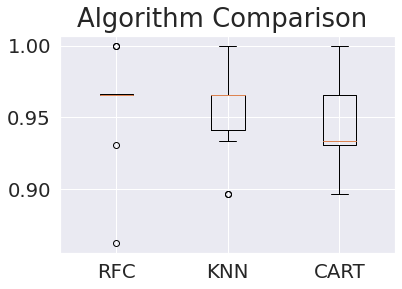

In [26]:

models = []
models.append(('RFC', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=0)
	cv_results = model_selection.cross_val_score(model, x_train_sc,y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [26]:
-
